<a href="https://colab.research.google.com/github/ShanthiniJoshitha/Spaceship-Titanic/blob/main/EXPLORATORY_DATA_ANALYSIS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive for loading data from Colab repository
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  Fals

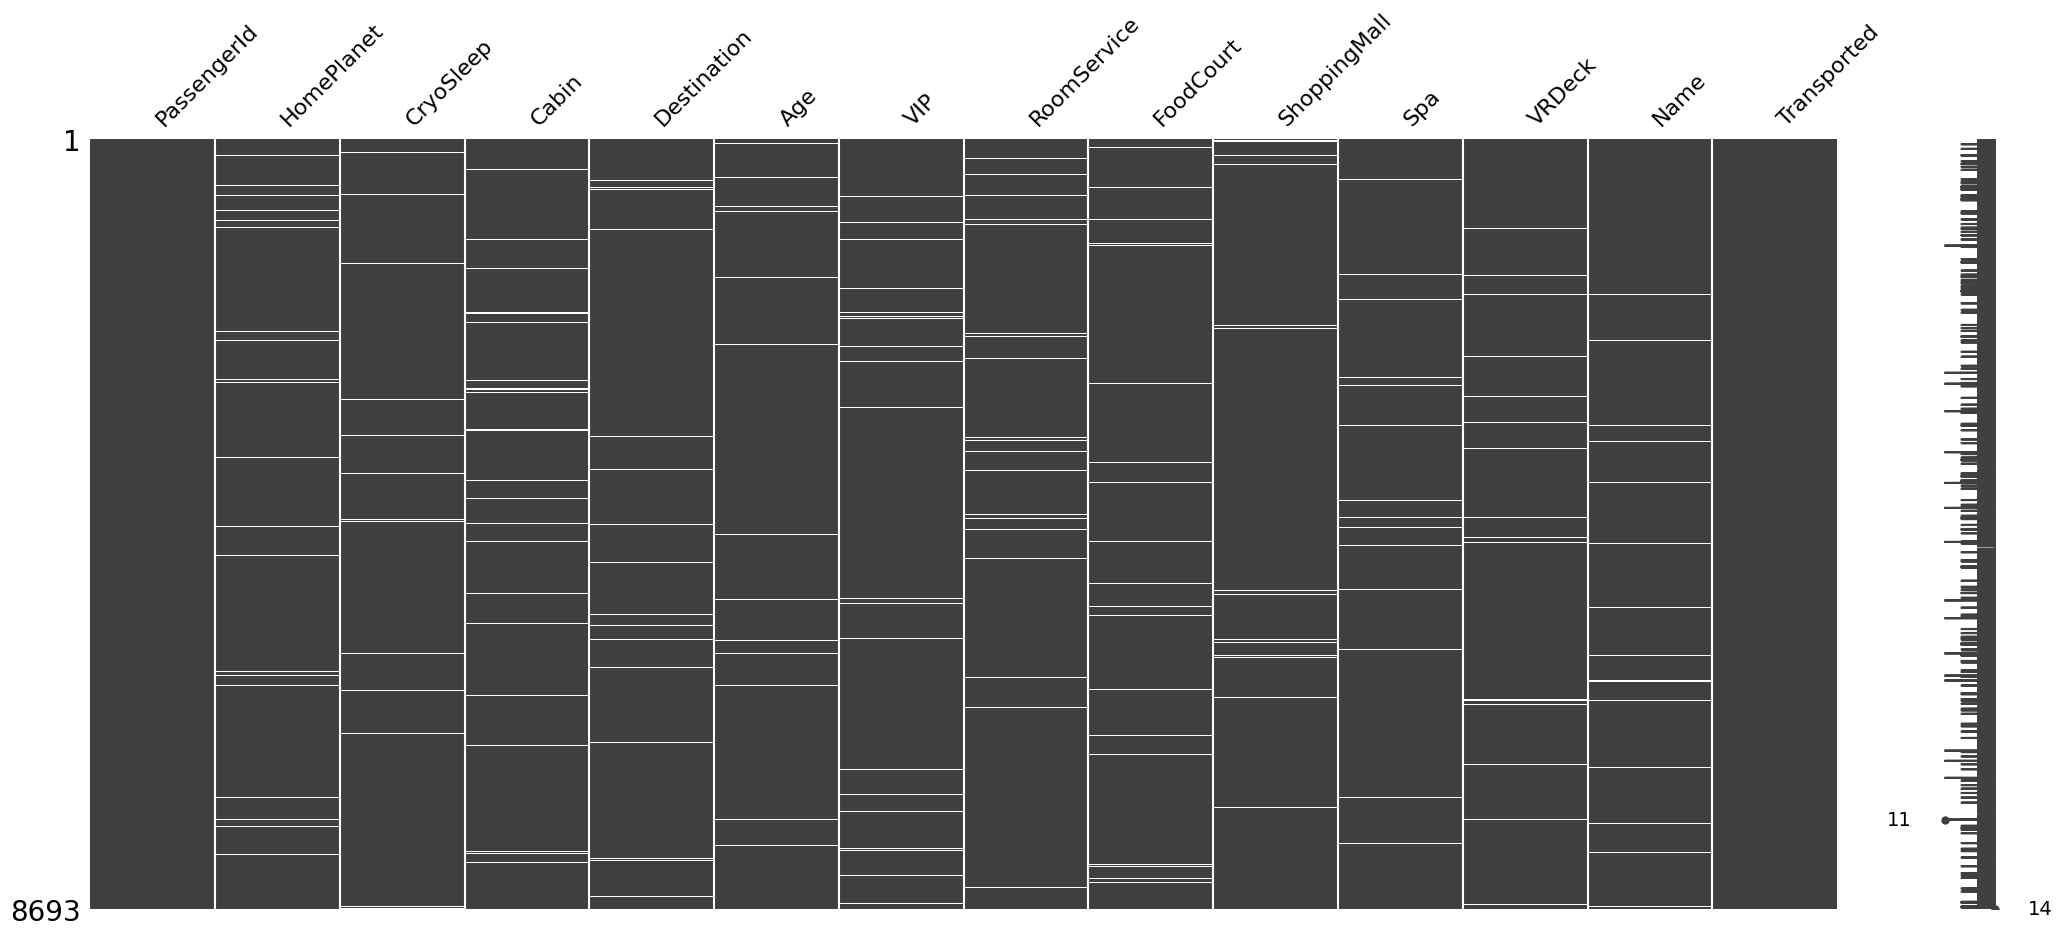

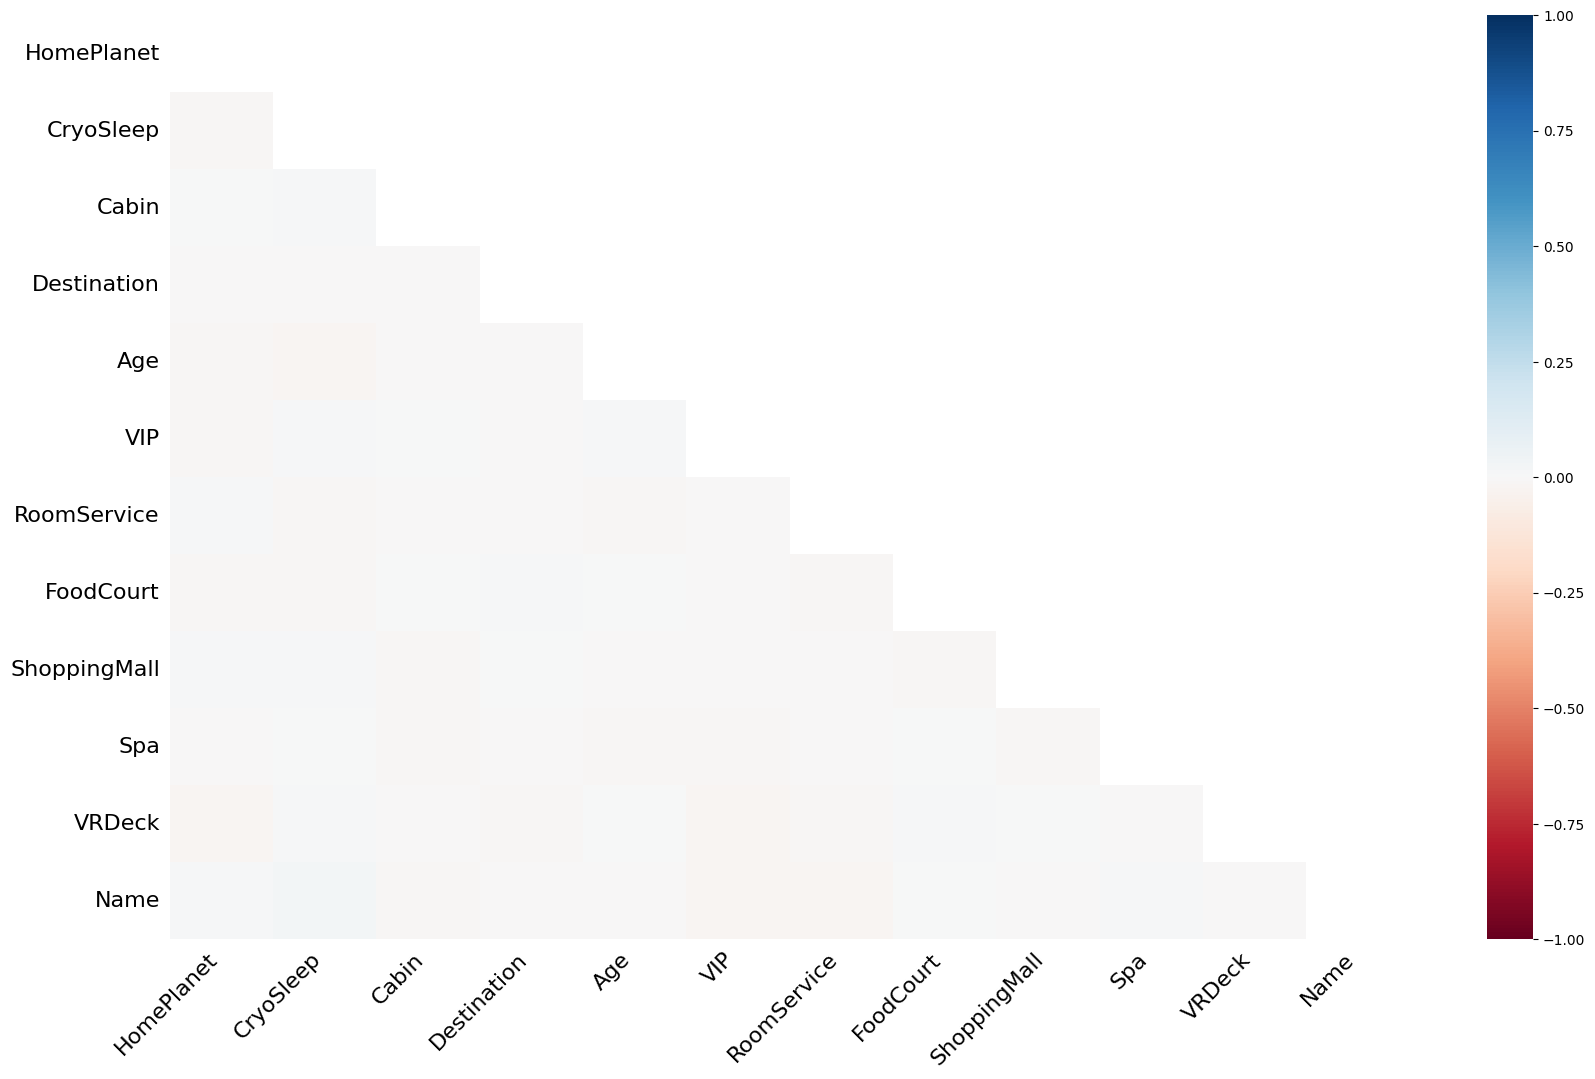

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


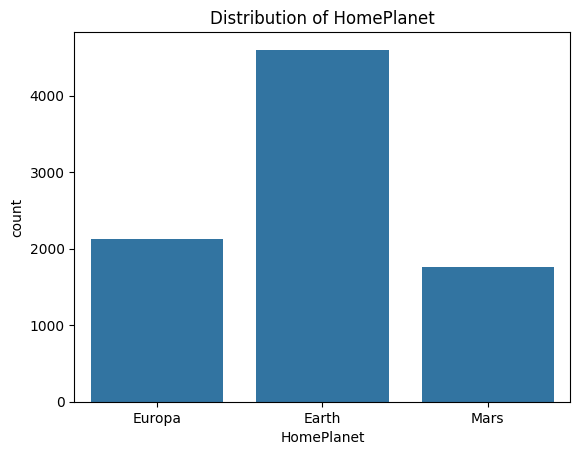

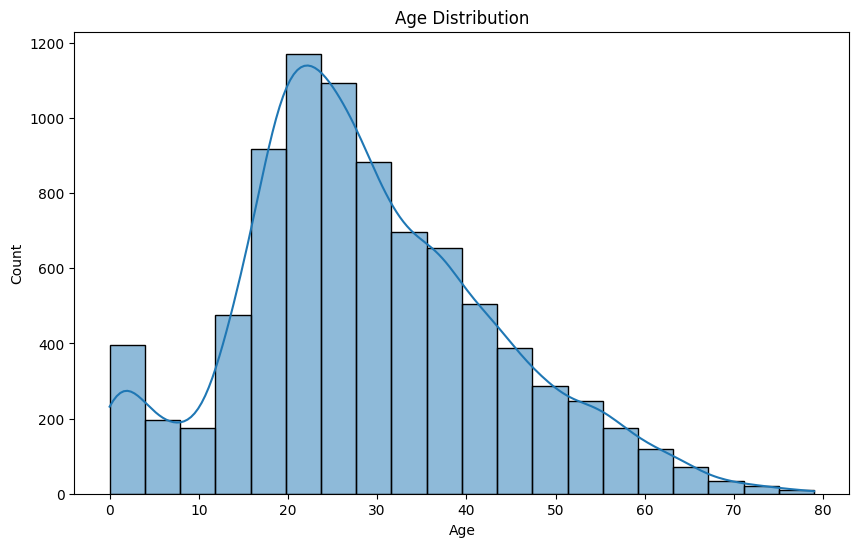

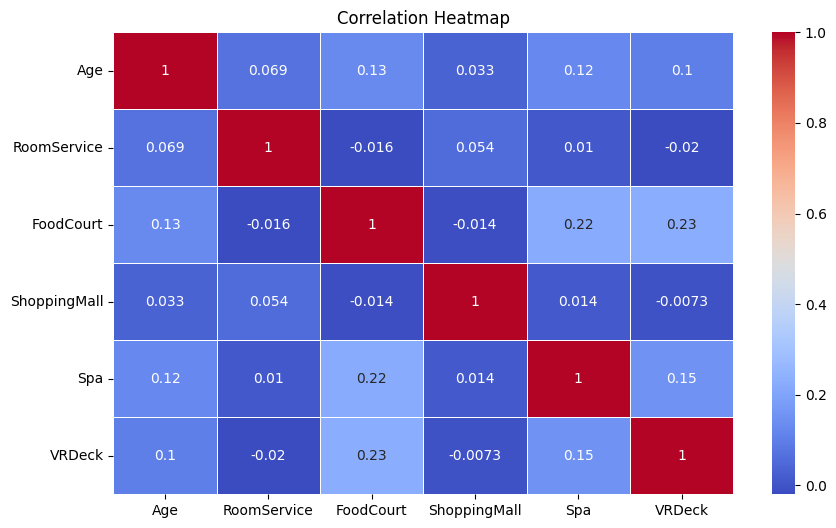

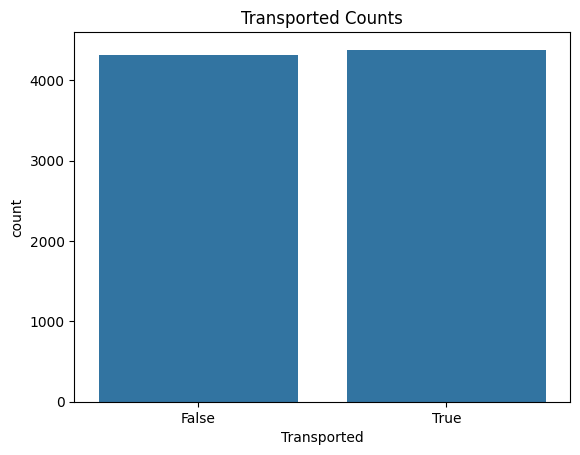

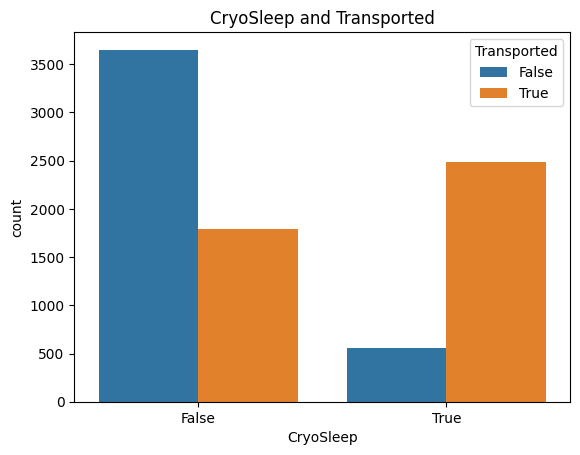

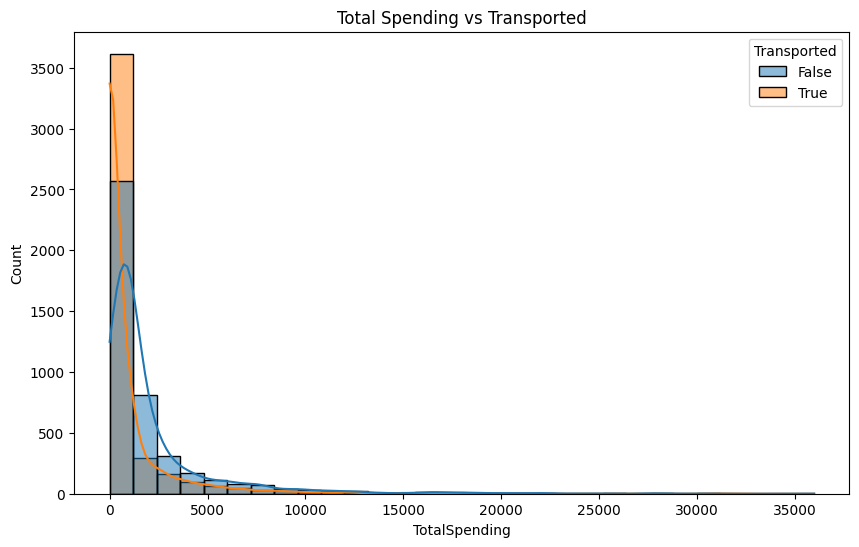

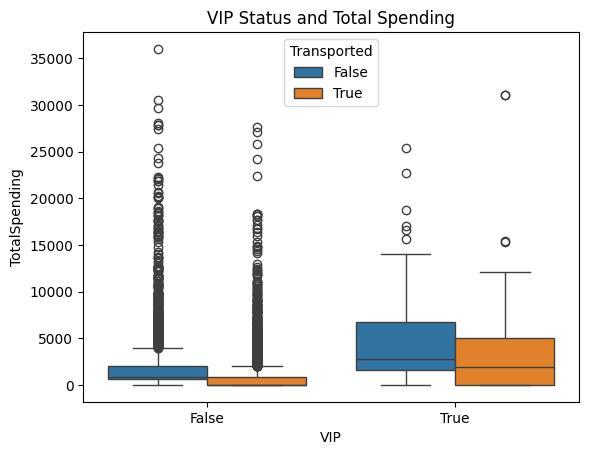

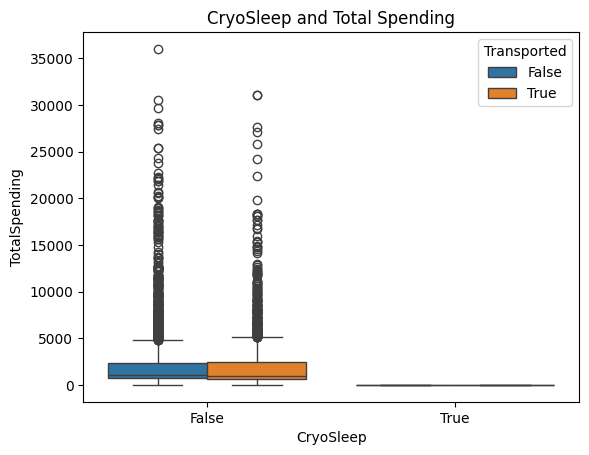

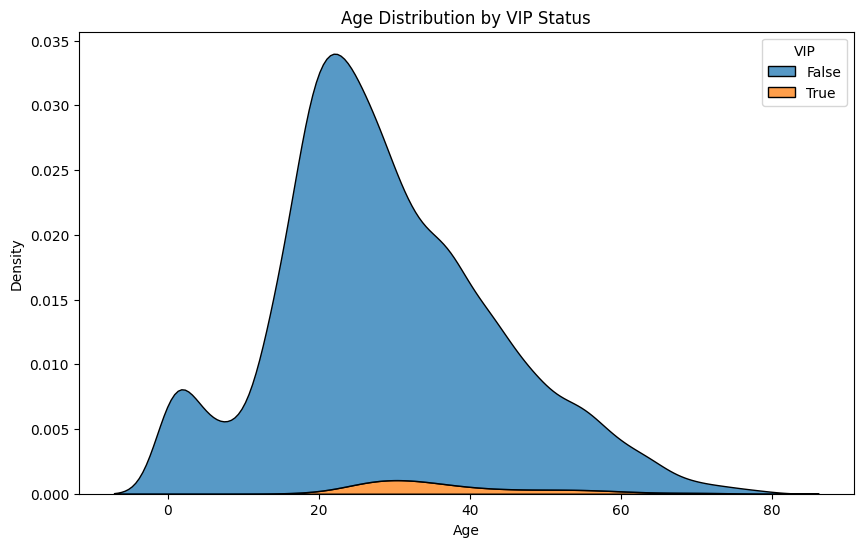

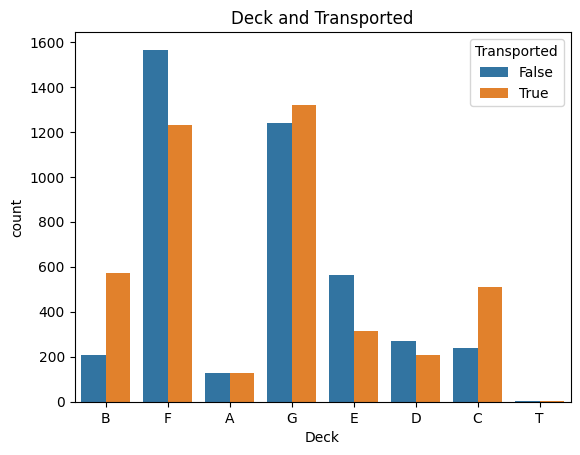

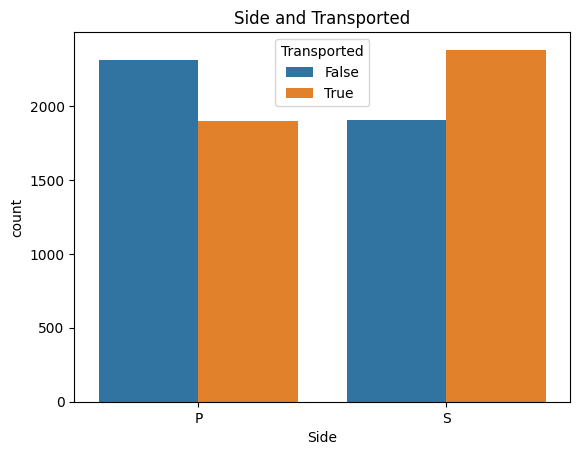

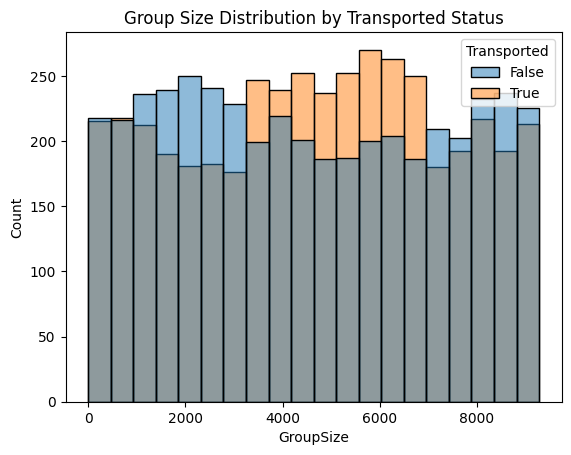

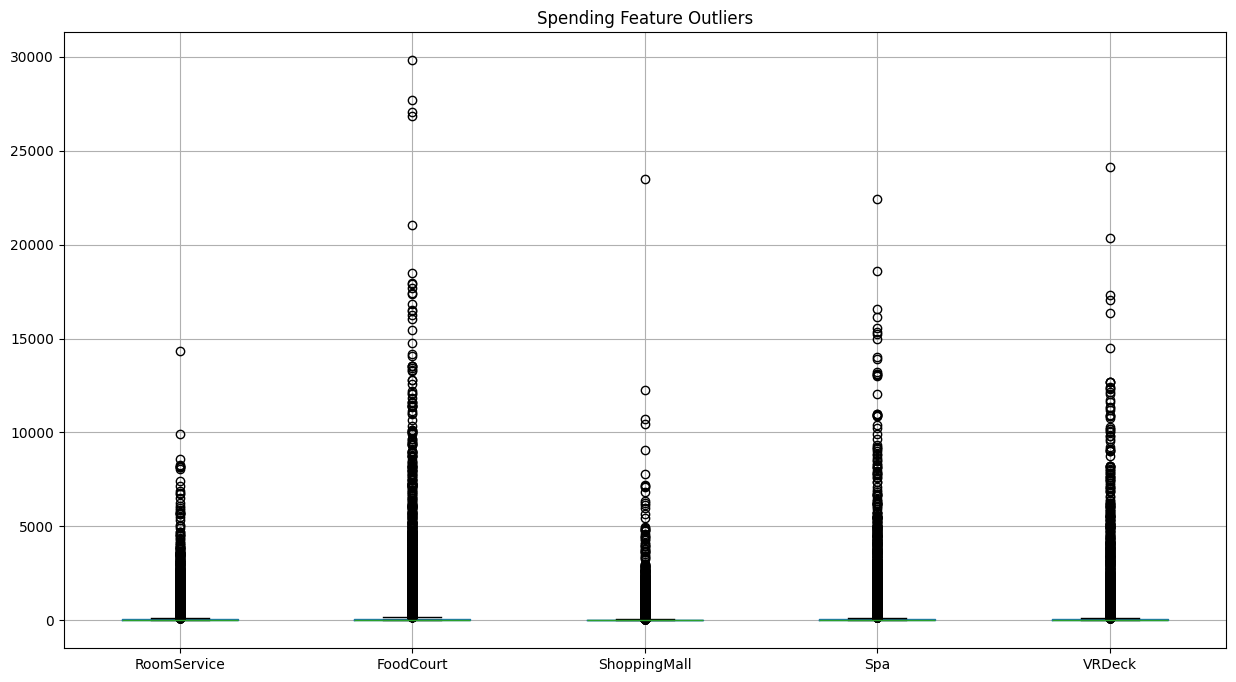

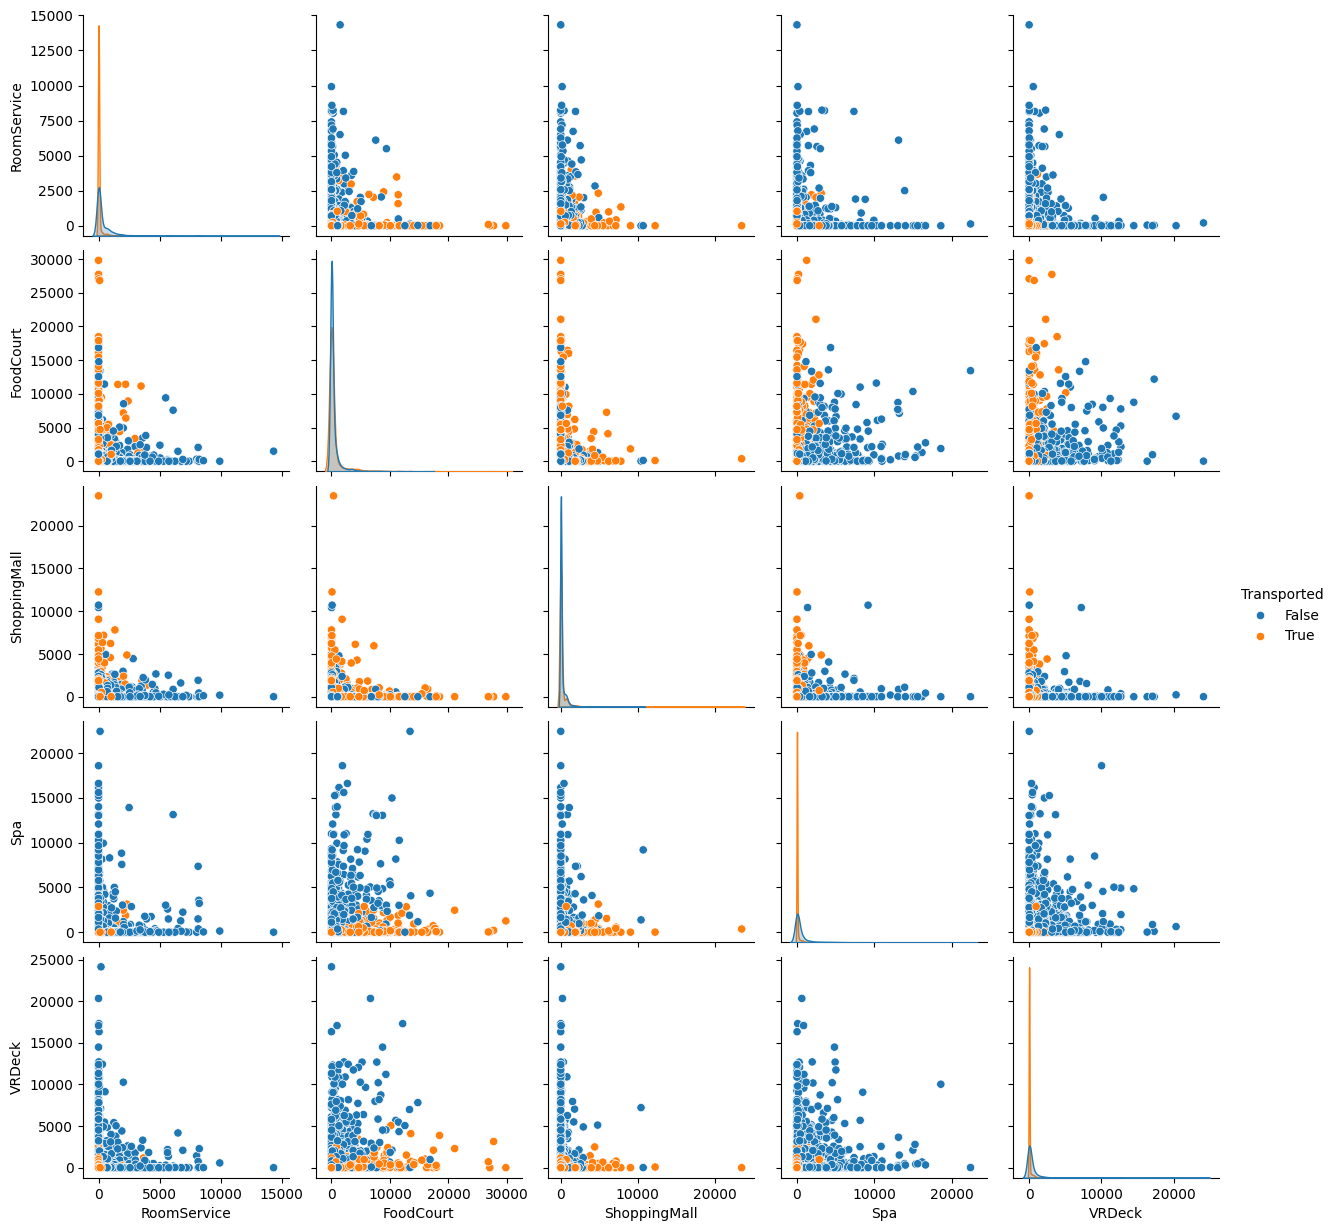

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            199
Destination        0
Age                0
VIP              203
RoomService        0
FoodCourt          0
ShoppingMall     208
Spa              183
VRDeck           188
Name             200
Transported        0
TotalSpending      0
Deck             199
Side             199
GroupSize          0
dtype: int64


<ipython-input-3-3bd1e9735c6a>:114: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['HomePlanet'].fillna(train['HomePlanet'].mode()[0], inplace=True)
<ipython-input-3-3bd1e9735c6a>:115: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load the dataset from Kaggle input directory
train = pd.read_csv('/content/train.csv')
# Check the structure of the dataset
print(train.info())

# Show the first few rows of the training dataset
print(train.head())

# Checking for missing values
missing_values = train.isnull().sum()
print(missing_values[missing_values > 0])

# Visualize missing values
msno.matrix(train)
plt.show()

msno.heatmap(train)
plt.show()

# Basic statistical summary
print(train.describe())

# Categorical variables analysis - Distribution of HomePlanet
sns.countplot(data=train, x='HomePlanet')
plt.title('Distribution of HomePlanet')
plt.show()

# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(train['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Correlation heatmap for numerical features
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.figure(figsize=(10,6))
sns.heatmap(train[numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Analyzing the relationship between Transported and other variables
sns.countplot(data=train, x='Transported')
plt.title('Transported Counts')
plt.show()

# Checking Transported based on CryoSleep status
sns.countplot(data=train, x='CryoSleep', hue='Transported')
plt.title('CryoSleep and Transported')
plt.show()

# Total spending by passengers across all categories
train['TotalSpending'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

# Plot total spending distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='TotalSpending', hue='Transported', bins=30, kde=True)
plt.title('Total Spending vs Transported')
plt.show()

# Spending patterns for VIP vs non-VIP passengers
sns.boxplot(data=train, x='VIP', y='TotalSpending', hue='Transported')
plt.title('VIP Status and Total Spending')
plt.show()

# Spending behavior of passengers in CryoSleep
sns.boxplot(data=train, x='CryoSleep', y='TotalSpending', hue='Transported')
plt.title('CryoSleep and Total Spending')
plt.show()

# Age distribution by VIP status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train, x='Age', hue='VIP', multiple='stack')
plt.title('Age Distribution by VIP Status')
plt.show()

# Cabin Deck and Side analysis (split Cabin into Deck and Side)
train['Deck'] = train['Cabin'].apply(lambda x: str(x).split('/')[0] if pd.notna(x) else np.nan)
train['Side'] = train['Cabin'].apply(lambda x: str(x).split('/')[-1] if pd.notna(x) else np.nan)

sns.countplot(data=train, x='Deck', hue='Transported')
plt.title('Deck and Transported')
plt.show()

sns.countplot(data=train, x='Side', hue='Transported')
plt.title('Side and Transported')
plt.show()

# Group size distribution based on PassengerId
train['GroupSize'] = train['PassengerId'].apply(lambda x: int(x.split('_')[0]))
sns.histplot(data=train, x='GroupSize', hue='Transported', bins=20)
plt.title('Group Size Distribution by Transported Status')
plt.show()

# Plotting the boxplots for spending categories to identify outliers
spending_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.figure(figsize=(15, 8))
train[spending_columns].boxplot()
plt.title('Spending Feature Outliers')
plt.show()

# Pairplot to analyze relationships between spending features
sns.pairplot(train[spending_columns + ['Transported']], hue='Transported', diag_kind='kde')
plt.show()

# Handling missing values (example)
# Filling missing values in categorical columns with the mode
train['HomePlanet'].fillna(train['HomePlanet'].mode()[0], inplace=True)
train['CryoSleep'].fillna(train['CryoSleep'].mode()[0], inplace=True)
train['Destination'].fillna(train['Destination'].mode()[0], inplace=True)

# Filling missing values in numerical columns with the median
train['Age'].fillna(train['Age'].median(), inplace=True)
train['RoomService'].fillna(train['RoomService'].median(), inplace=True)
train['FoodCourt'].fillna(train['FoodCourt'].median(), inplace=True)

# Verify that there are no more missing values
print(train.isnull().sum())